# Understanding Effect Size from Differences in Mean

## Synopsis

- *Working Definition* : Working from a sample of a population and trying to estimate something about the world
- We are trying to generalize from what we measure about the world from a sample. 
- *Statistical Inference*
    - Estimate Effect Size
    - Quantify precision of the result[ Confidence Interval / standard error]
    - Doing Hypothesis testing: [What is chance that the difference is zero? Or in another words, it happened by chance?]

## Imports

In [ ]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib as plt
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from
# seed the random number generator so we all get the same results
np.random.seed(17)

# some nice colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

In [ ]:
%matplotlib inline

## Part 1

### Population distribution

In [ ]:
mu1, sig1 = 178, 7.7
male_height = stats.norm(mu1, sig1); male_height

In [ ]:
mu2, sig2 = 163, 7.3
female_height = stats.norm(mu2, sig2); female_height

### Function to evaluate normal(Gaussian) PDF

In [ ]:
def eval_pdf(rv, n=4):
    mean, std = rv.mean(), rv.std()
    xs = np.linspace(mean - n*std, mean + n*std, 100)
    ys = rv.pdf(xs)
    return xs, ys

In [ ]:
xs_male, ys_male = eval_pdf(male_height)
xs_female, ys_female = eval_pdf(female_height)


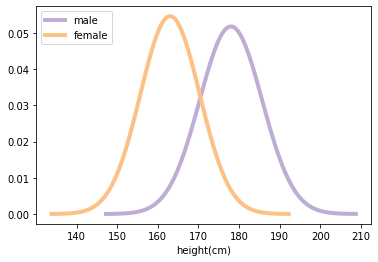

In [ ]:
fig= plt.figure()
ax = fig.gca()
ax.plot(xs_male, ys_male, label='male', linewidth=4, color=COLOR2)
ax.plot(xs_female, ys_female, label='female', linewidth=4, color=COLOR3)
plt.xlabel('height(cm)')
plt.legend(loc='upper left')
plt.show()

### Random Sampling from distribution/population

In [ ]:
male_sample = male_height.rvs(1000); male_sample.shape

(1000,)

In [ ]:
female_sample = female_height.rvs(1000); female_sample.shape

(1000,)

Mean of sample will be close to population but not exactly same

In [ ]:
mean1, std1 = male_sample.mean(), male_sample.std()
mean1, std1

(178.16511665818112, 7.84199617128995)

In [ ]:
mean2, std2 = female_sample.mean(), female_sample.std()
mean2, std2

(163.48610226651135, 7.382384919896662)

In [ ]:
difference_in_mean = mean1-mean2
difference_in_mean

14.679014391669767

In [ ]:
relative_difference_by_sample = (2*difference_in_mean/(mean1+mean2))*100
relative_difference_by_sample

8.59298230392402

In [ ]:
relative_difference_by_distribution = (2*difference_in_mean/(mu1+mu2))*100
relative_difference_by_distribution

8.609392605084908

In [ ]:
relative_difference_by_male = difference_in_mean/mu1*100
relative_difference_by_male

8.24663729869088

In [ ]:
relative_difference_by_female = difference_in_mean/mu2*100
relative_difference_by_female

9.005530301637894

*Which one is correct?*
- Here things are symmetric so you can express in either way 
- What about taking avg?
- There may be situation where you have a treatment group and control group. There you might want to do 

$Diff_{treatment}/ mean_{control}$

## Part 2

### Understanding the overlap, threshold, misclassification rate

Alternative way to quantify difference is to see how much they overlap

#### Simple threshold

In [ ]:
simple_thresh = (mean1 + mean2)/2; simple_thresh

170.82560946234622

#### Threshold(more appropriate)

In [ ]:
thresh = (mean1*std2+mean2*std1)/(std1+std2); thresh

170.6040359174722

#### Overlap

How many male below threshold ?

In [ ]:
male_below_thresh = sum(male_sample<thresh); male_below_thresh

164

How many female above threshold ?

In [ ]:
female_above_thresh = sum(female_sample>thresh); female_above_thresh

174

_The "overlap" is the area under the curves that ends up on the wrong side of the threshold_

In [ ]:
male_overlap = male_below_thresh / len(male_sample)
female_overlap = female_above_thresh / len(female_sample)
male_overlap, female_overlap

# overlap = (male_overlap + female_overlap)

(0.164, 0.174)

#### Misclassification Rate

In [ ]:
misclassification_rate = (male_overlap+female_overlap)/2; misclassification_rate

0.16899999999999998

#### Probability of superiority

Another way to quantify the difference between distributions is what's called "probability of superiority", which is a problematic term.

- In this context it's the probability that a randomly-chosen man is taller than a randomly-chosen woman.

In [ ]:
sum(male_sample > female_sample), (male_sample> female_sample).mean()

(918, 0.918)

##### Distribution of Superiority

In [ ]:
male_sample[:5]

array([178.44105417, 170.49028233, 170.94885314, 188.07981499,
       171.51692076])

In [ ]:
np.random.shuffle(male_sample)
male_sample[:5]

array([180.02059072, 185.18602683, 177.45366243, 176.95014285,
       186.13226315])

In [ ]:
s = []
for i in range(100):
    np.random.shuffle(male_sample)
    np.random.shuffle(female_sample)
    s.append((male_sample> female_sample).mean())

In [ ]:
prob_sup_sample = np.array(s)

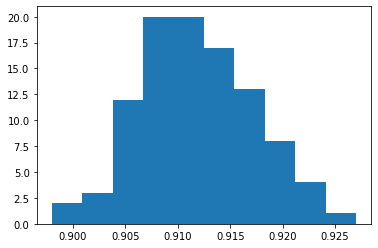

In [ ]:
plt.hist(prob_sup_sample)
plt.show()

In [ ]:
@interact
def plot_prob_sup(n_trials=(100, 1000), n_bins=(20, 40)):
    s = []
    for i in range(n_trials):
        np.random.shuffle(male_sample)
        np.random.shuffle(female_sample)
        s.append((male_sample> female_sample).mean())
    prob_sup_sample = np.array(s)
    mean = np.mean(prob_sup_sample)
    std = np.std(prob_sup_sample)
    plt.title(f"$\mu$ {mean:0.01f} \n $\sigma$ {std:0.03f} \n n {n_trials}")
    
    plt.hist(prob_sup_sample, bins=n_bins, color=COLOR1)
    plt.axvline(x=mean, color=COLOR3)
    plt.axvline(x=mean-2*std, color=COLOR2)
    plt.axvline(x=mean+2*std, color=COLOR2)
    plt.xlim(.890, .950)
    plt.xlabel("N[male_height > female_height]")
    plt.show()  

interactive(children=(IntSlider(value=550, description='n_trials', max=1000, min=100), IntSlider(value=30, des…

```{note}

Overlap(or misclassification rate) & "probability of superiority" have 2 good properties:

- As probabilities, they don't depend on UOM- Comparable between studies

- Expressed in Operational terms ( sense of what practical effect the difference makes)
```

#### Cohens' Effect Size

Difference in mean , standardized by dividing by std. dev

$d = \frac{\bar{x_1} - \bar{x_2}}{s}$

Pooled standard deviation

$s = \sqrt{\frac{n_1{s_1}^2+n_2{s_2}^2}{n_1+n_2}}$

##### Implementation cohen's effectsize

In [ ]:
def cohen_effectsize(grp1, grp2):
    diff = grp1.mean() - grp2.mean()
    
    n1, n2 = len(grp1), len(grp2)
    var1 = grp1.var()
    var2 = grp2.var()
    
    pooled_var = (n1*var1+n2*var2)/(n1+n2)
    
    d = diff/np.sqrt(pooled_var)
    return d

In [ ]:
cohen_effectsize(male_sample, female_sample)

1.9274780043619493

##### Implementation overlap_superiority

In [ ]:
def overlap_superiority(control, treatment, n=1000):
    
    control_sample = control.rvs(n)
    treatment_sample = treatment.rvs(n)
#     mean1, std1 = control_sample.mean(), control_sample.std()
#     mean2, std2 = treatment_sample.mean(), control_sample.std()
# #     treatment_sample.mean()
#     thresh = (mean1*std2+mean2*std1)/(std1+std2)
    thresh = (control.mean()+treatment.mean())/2
    
    control_above = sum(control_sample > thresh)
    treatment_below = sum(treatment_sample < thresh)
    overlap = (control_above + treatment_below)/n
    superiority =  (treatment_sample> control_sample).mean()
    return overlap , superiority
    

In [ ]:
overlap_superiority(male_height, female_height)

(1.672, 0.083)

In [ ]:
def plot_pdfs(cohen_d=2):
    control = stats.norm(0,1)
    treatment = stats.norm(cohen_d,1)
    xs, ys = eval_pdf(control)
    plt.fill_between(xs, ys, label='control', 
                        color=COLOR3, alpha=0.7)
    xs, ys = eval_pdf(treatment)
    plt.fill_between(xs, ys, label='treatment', 
                        color=COLOR2, alpha=0.7)
    o, s = overlap_superiority(control, treatment)
    plt.text(0, 0.05, 'overlap ' + str(o))
    plt.text(0, 0.15, 'superiority ' + str(s))
    plt.show()
    

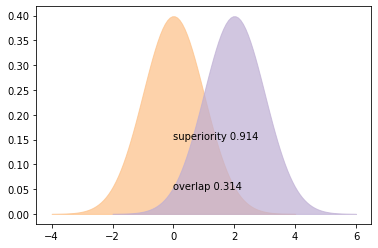

In [ ]:
plot_pdfs(2)

In [ ]:
slider = widgets.FloatSlider(min=0, max=4.1, value=2)
interactive(plot_pdfs, cohen_d=slider)

interactive(children=(FloatSlider(value=2.0, description='cohen_d', max=4.1), Output()), _dom_classes=('widget…

```{note}

- Cohen effect size non dimensional
- Can be used to calculate overlap and probability of superiority


```